# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt 

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipo = pd.read_csv(url, sep="\t")
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

While the exercise asks for a histogram, the solution is presented as a barchart

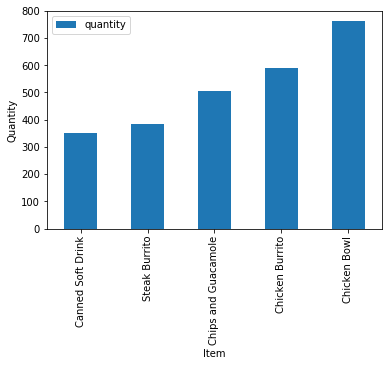

In [34]:
# Obtain a DataFrame with the top 5 items
top5 = chipo.groupby(by="item_name")['quantity', 'item_name'].sum().sort_values(by="quantity", ascending=False)[:5]

# Re-sort the dataframe in ascending order
top5 = top5.sort_values(by="quantity")

# top5
ax = top5.plot(kind="bar", sort_columns=False)
ax.set_xlabel('Item')
ax.set_ylabel('Quantity')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [37]:
# Convertprice to float
price_to_float = lambda x : float(x[1:])
chipo['price_f'] = chipo['item_price'].apply(price_to_float)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,price_f
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


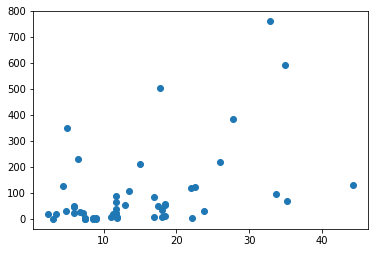

In [52]:
item_tot = chipo.groupby(by='item_name', as_index=False).agg({'quantity':sum, 'price_f': max})

plt.scatter(x=item_tot['price_f'], y=item_tot['quantity'])

### Step 7. BONUS: Create a question and a graph to answer your own question.

I will be looking into creating a histogram with the number of items ordered per order_id

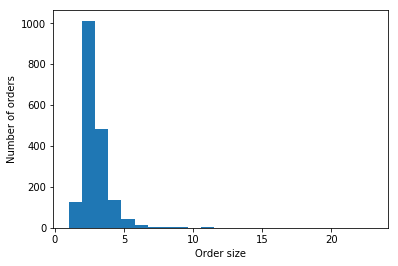

In [73]:
ord_size = chipo.groupby('order_id', as_index=False)['quantity'].count()

plt.hist(x=ord_size['quantity'],bins = ord_size['quantity'].max())
plt.xlabel('Order size')
plt.ylabel('Number of orders')
plt.show()